In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [9]:
SAMPLES = 3200 # количество отсчётов
t = np.linspace(0, 5, SAMPLES, endpoint=True) # массив отсчётов времени в интервале [0, 1]
signal = np.cos(2 * np.pi * t) # тестовый сигнал

In [7]:
arr1 = np.zeros(3200, dtype=int)
arr1[0:3200:40] = 1
arr2 = np.zeros(3200, dtype=int)
arr2[0:3200:50] = 1
arr3 = np.zeros(3200, dtype=int)
arr3[0:3200:100] = 1

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [10]:
discret1 = signal * arr1
discret2 = signal * arr2
discret3 = signal * arr3


[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]


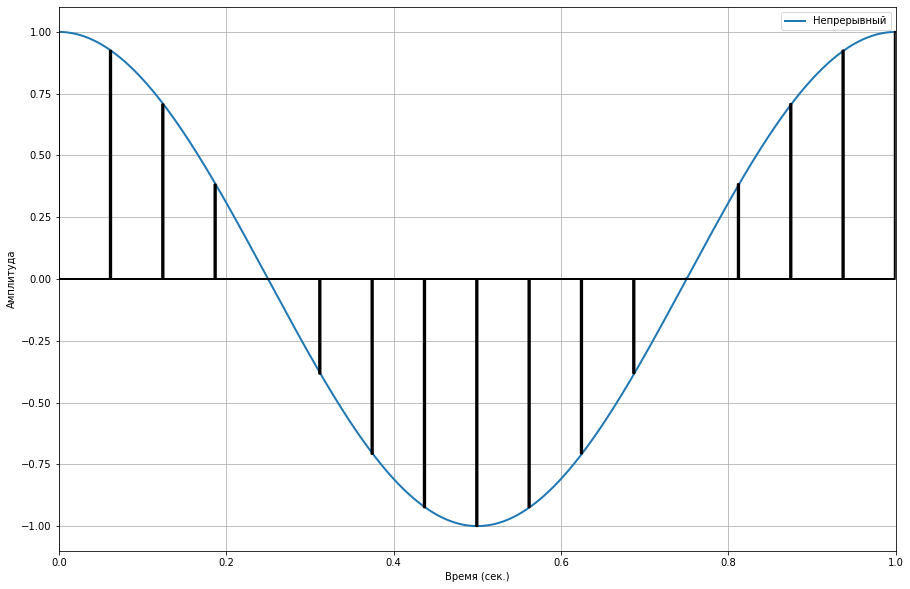

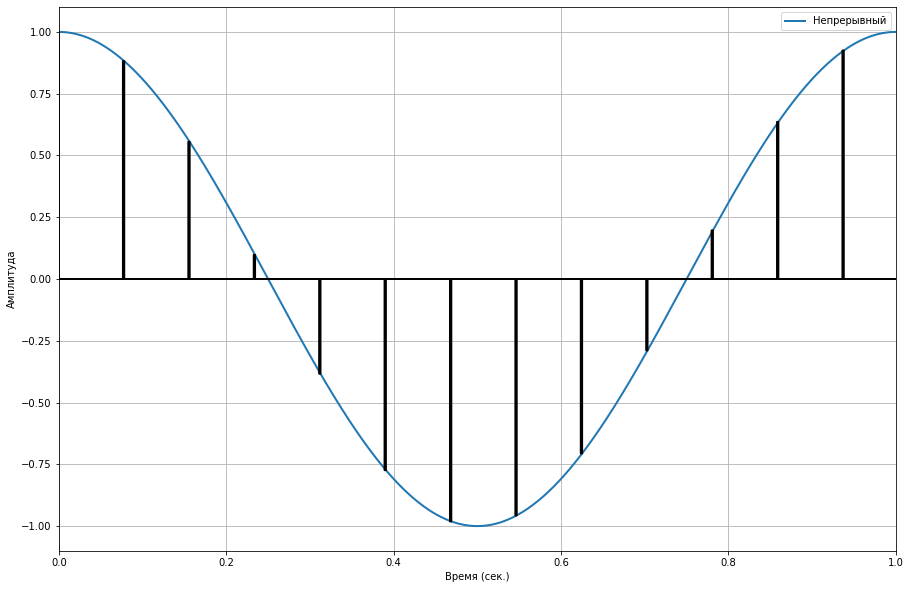

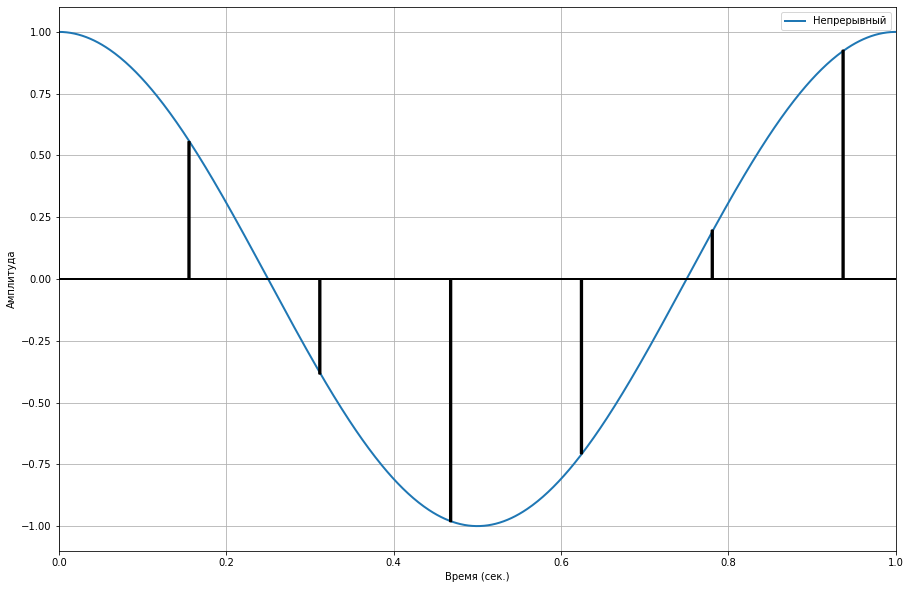

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(t, signal, '-', linewidth=2.0, label='Непрерывный')
plt.step(t,discret1, 'k', linewidth=2.0) 
plt.grid()
plt.xlim([0, 1])
plt.xlabel('Время (сек.)')
plt.ylabel('Амплитуда')
plt.legend()

plt.figure(figsize=(15, 10))
plt.plot(t, signal, '-', linewidth=2.0, label='Непрерывный')
plt.step(t,discret2, 'k', linewidth=2.0) 
plt.grid()
plt.xlim([0, 1])
plt.xlabel('Время (сек.)')
plt.ylabel('Амплитуда')
plt.legend()

plt.figure(figsize=(15, 10))
plt.plot(t, signal, '-', linewidth=2.0, label='Непрерывный')
plt.step(t,discret3, 'k', linewidth=2.0) 
plt.grid()
plt.xlim([0, 1])
plt.xlabel('Время (сек.)')
plt.ylabel('Амплитуда')
plt.legend()


plt.show()

In [48]:
def quantize_uniform(signal_ampl, quant_min=-1.0, quant_max=1.0, quant_level=4):
    x_normalize = (signal_ampl - quant_min) * (quant_level - 1) / (quant_max - quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.round(x_normalize)
    x_quant = x_normalize_quant * (quant_max - quant_min) / (quant_level - 1) + quant_min
    return x_quant

In [49]:
def plot_graph_quant_function(axis, quant_min=-1.0, quant_max=1.0, quant_level=256):
    x_cont = np.linspace(quant_min, quant_max, 1000)
    x_quant = quantize_uniform(x_cont, quant_min=quant_min,
                               quant_max=quant_max, quant_level=quant_level)
    quant_stepsize = (quant_max - quant_min) / (quant_level - 1)
    title = f'$L = {quant_level:d}, \\Delta = {quant_stepsize:.2f}$'
    # title = r'$L = %d, \Delta=%0.2f$' % (quant_level, quant_stepsize)
    error = np.abs(x_quant - x_cont)
    axis.plot(x_cont, x_cont, color='k', label='Исходная амплитуда')
    axis.plot(x_cont, x_quant, color='b', label='Квантованная амплитуда')
    axis.plot(x_cont, error, 'r--', label='Ошибка квантования')
    axis.set_title(title)
    axis.set_xlabel('Амплитуда')
    axis.set_ylabel('Квантованная амплитуда/ошибка')
    axis.set_xlim([quant_min, quant_max])
    axis.set_ylim([quant_min, quant_max])
    axis.grid('on')
    axis.legend()

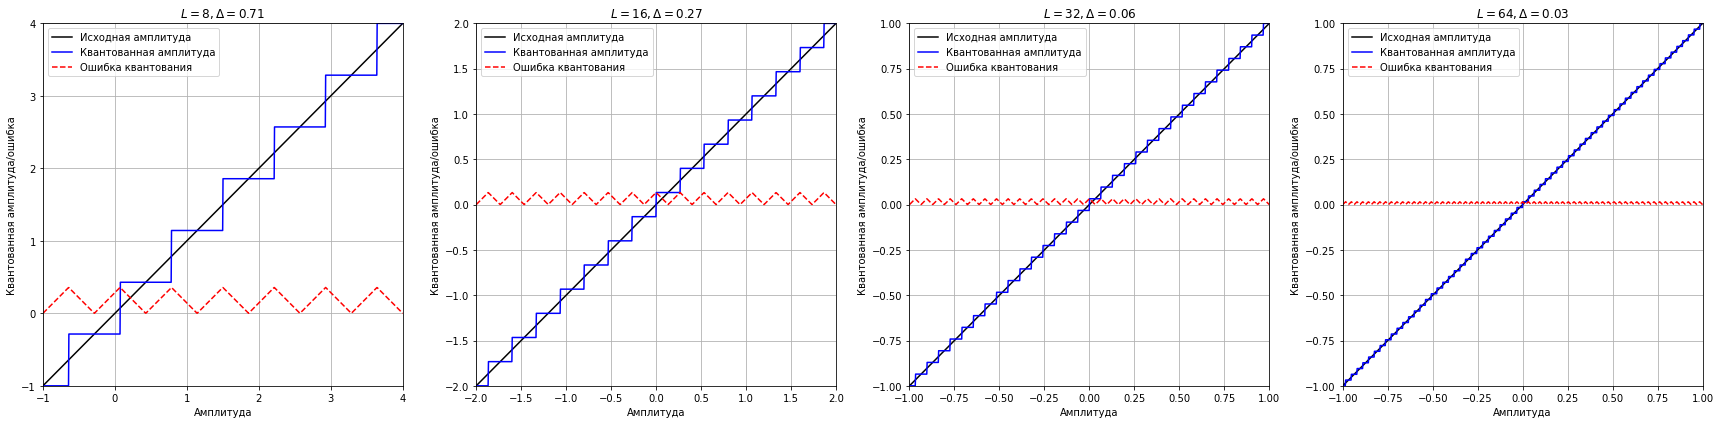

In [55]:
plt.figure(figsize=(24, 6))
ax = plt.subplot(1, 4, 1)
plot_graph_quant_function(ax, quant_min=-1, quant_max=4, quant_level=8)
ax = plt.subplot(1, 4, 2)
plot_graph_quant_function(ax, quant_min=-2, quant_max=2, quant_level=16)
ax = plt.subplot(1, 4, 3)
plot_graph_quant_function(ax, quant_min=-1, quant_max=1, quant_level=32)
ax = plt.subplot(1, 4, 4)
plot_graph_quant_function(ax, quant_min=-1, quant_max=1, quant_level=64)
plt.tight_layout()
plt.show()